In [1]:
"""
Normal distribution. 
Using histograms with and without cumulative option observe how increasing variance and mean changes look of the distribution. 
Check how number of bins influences the plots. 
Consider what would make normal distribution weekly informative and what will make it informative
"""
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mean = np.arange(-4, 4)
std  = np.arange(0.25, 2.25, 0.25)

constant_mean = 0
constant_std = 0.3

normal_dist_constant_mean_dict = dict()
normal_dist_constant_std_dict = dict()

for it in range(0,len(mean)):
    normal_dist_constant_mean_dict.update({"normal_dist_" + str(constant_mean) + "_" + str(std[it]):np.random.normal(loc=constant_mean,scale=std[it],size=10000)})
    normal_dist_constant_std_dict.update({"normal_dist_" + str(mean[it]) + "_" + str(constant_std):np.random.normal(loc=mean[it],scale=constant_std,size=10000)})


In [3]:
df_constant_mean = pd.DataFrame.from_dict(normal_dist_constant_mean_dict)
df_constant_mean.head()
df_constant_std = pd.DataFrame.from_dict(normal_dist_constant_std_dict)

In [4]:
melted_constant_mean_df = df_constant_mean.melt()
melted_constant_std_df = df_constant_std.melt()

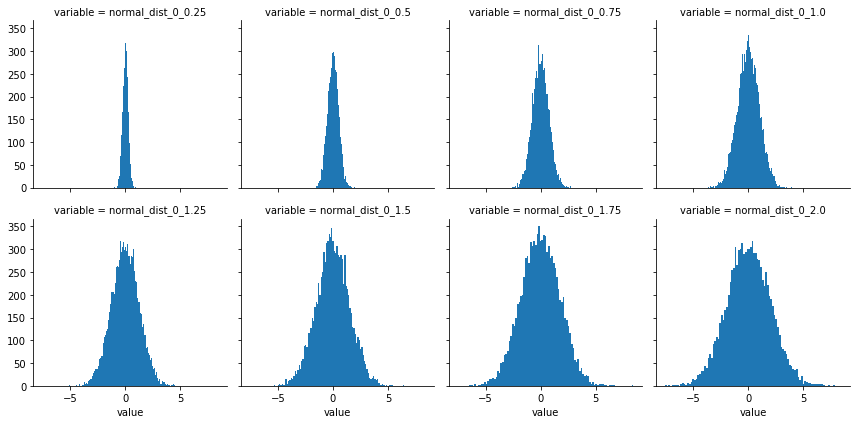

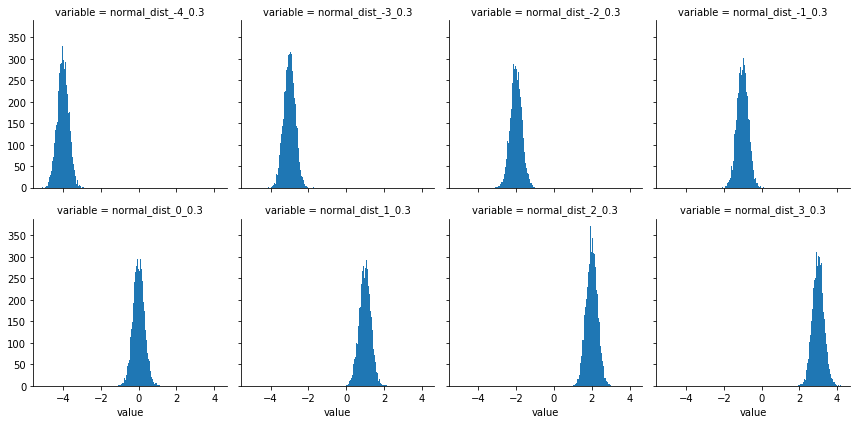

In [5]:
Graph = sns.FacetGrid(melted_constant_mean_df, col="variable", col_wrap = 4, sharex=True)
Graph.map(plt.hist,"value",cumulative=False,bins=100)
Graph = sns.FacetGrid(melted_constant_std_df, col="variable", col_wrap = 4, sharex=True)
Graph.map(plt.hist,"value",cumulative=False,bins=100)

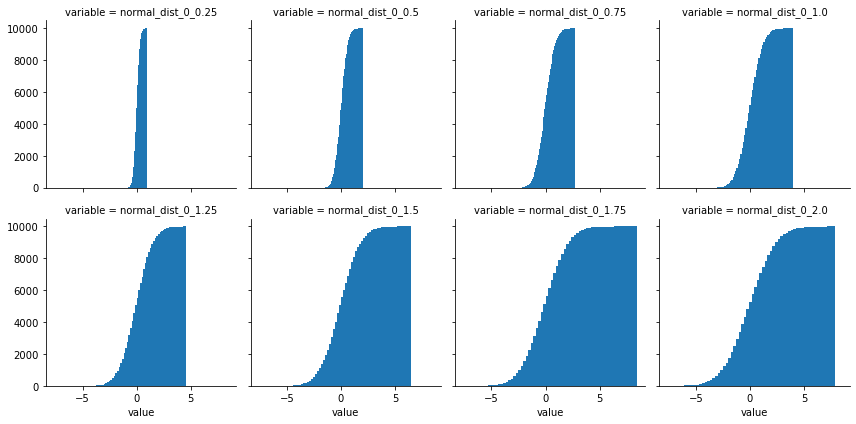

In [6]:
GraphCum = sns.FacetGrid(melted_constant_mean_df, col="variable", col_wrap = 4, sharex=True)
GraphCum.map(plt.hist,"value",cumulative=True,bins=64)

In [7]:
"""
Transform samples from normal distribution with inverse logit. 
Consider how mean and standard deviation influence the shape of histogram and cdf. 
Is previously non-informative normal is still non-informative after transformation?
"""
from scipy.special import expit
expit_df_constant_mean = expit(df_constant_mean)
melted_expit_df_constant_mean = expit_df_constant_mean.melt()
expit_df_constant_std = expit(df_constant_std)
melted_expit_df_constant_std = expit_df_constant_std.melt()

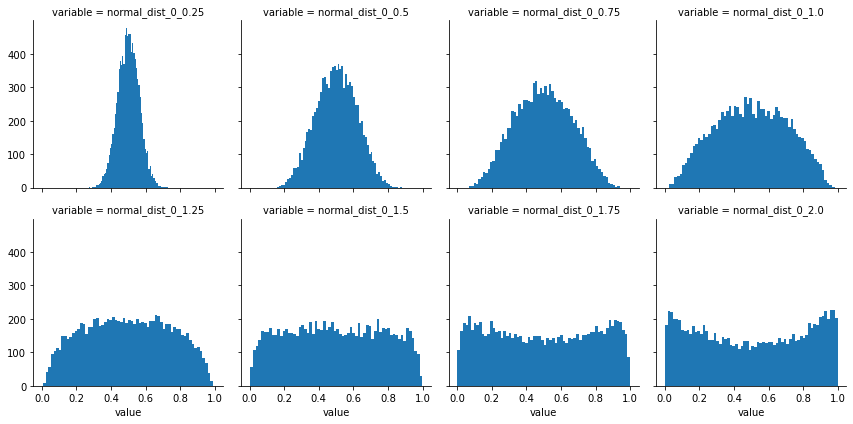

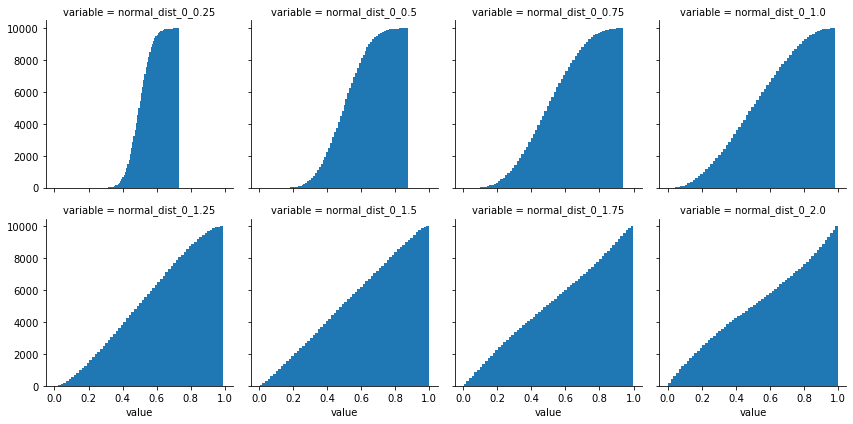

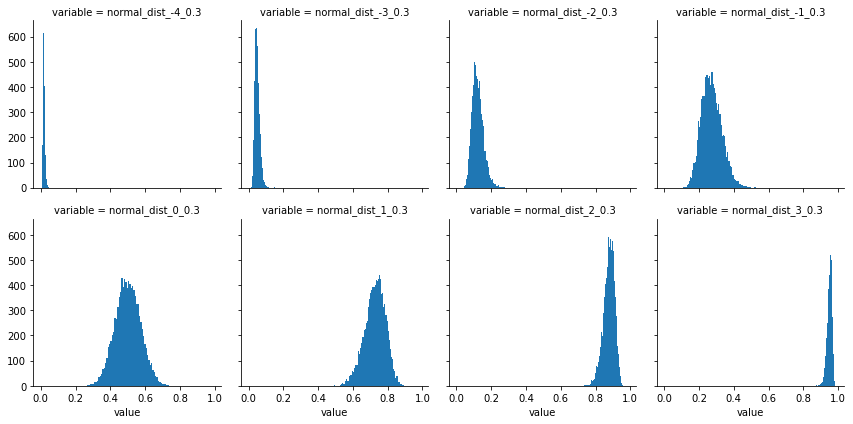

In [8]:
GraphExpit = sns.FacetGrid(melted_expit_df_constant_mean, col="variable", sharex=True, col_wrap=4)
GraphExpit.map(plt.hist, "value", cumulative=False, bins=64)
GraphExpitCum = sns.FacetGrid(melted_expit_df_constant_mean, col="variable", sharex=True, col_wrap=4)
GraphExpitCum.map(plt.hist, "value", cumulative=True, bins=64)
GraphExpit = sns.FacetGrid(melted_expit_df_constant_std, col="variable", sharex=True, col_wrap=4)
GraphExpit.map(plt.hist, "value", cumulative=False, bins=64)

In [9]:
"""
Poisson distribution. 
This distribution returns integers (give histogram location of bins instead of their numbers), depending on intensity. 
This is a good distribution for modelling countable effects. 
Observe how mean and variance influence the shape.
"""

poisson_dict={
    "Poisson_Interval=2":  np.random.poisson(2,100000),
    "Poisson_Interval=4":  np.random.poisson(4,100000),
    "Poisson_Interval=8":  np.random.poisson(8,100000),
    "Poisson_Interval=16": np.random.poisson(16,100000),
    "Poisson_Interval=32": np.random.poisson(32,100000)    
}

In [10]:
poisson_df = pd.DataFrame.from_dict(poisson_dict)
poisson_melted = poisson_df.melt()

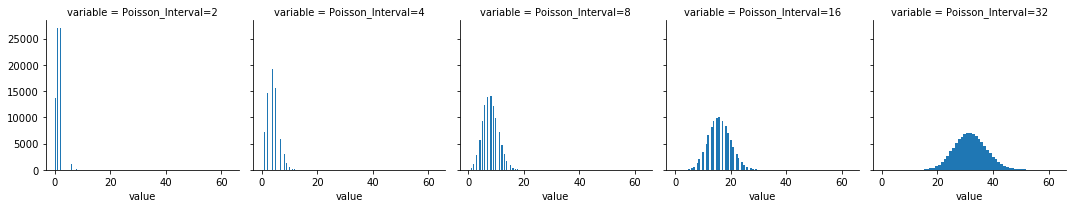

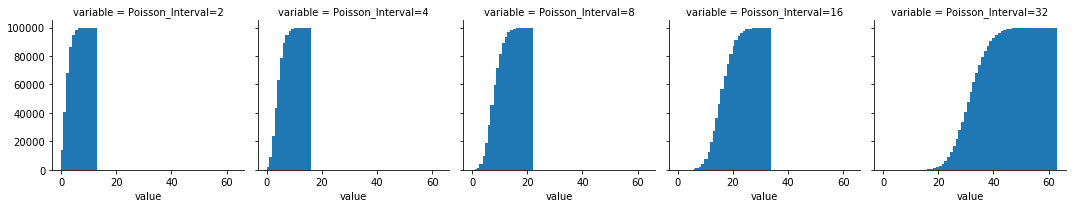

In [11]:
Graph_Poisson = sns.FacetGrid(poisson_melted, col="variable", sharex=True, col_wrap=5)
Graph_Poisson.map(plt.hist, "value", cumulative=False, bins=50)
Graph_Poisson_Cum = sns.FacetGrid(poisson_melted, col="variable", sharex=True, col_wrap=5)
Graph_Poisson_Cum.map(plt.hist, "value", cumulative=True, bins=50)

In [12]:
"""
Beta distribution. 
This is a distribution defined on [0,1] interval. 
It is useful as a prior for probability parameters (like binomial distribution). 
Traditionally it is defined with $\alpha$ and $\beta$ parameters. 
There are however different reparametrizations possible. 
Verify how beta distributions behave for their natural parametrization, location dispersion parametrization and mean-population size parametrization (see lecture notes)
"""

beta_dict={
    "Beta_alpha=1_beta=1":  np.random.beta(1, 1, 10000),
    "Beta_alpha=10_beta=1": np.random.beta(10,1, 10000),
    "Beta_alpha=1_beta=10": np.random.beta(1, 10,10000),
    "Beta_alpha=10_beta=10":np.random.beta(6,6,10000),
    "Beta_alpha=3_beta=9":  np.random.beta(2, 8, 10000),
    "Beta_alpha=8_beta=2":  np.random.beta(0.1, 0.1, 10000)
}

In [13]:
beta_df = pd.DataFrame.from_dict(beta_dict)
beta_melted = beta_df.melt()

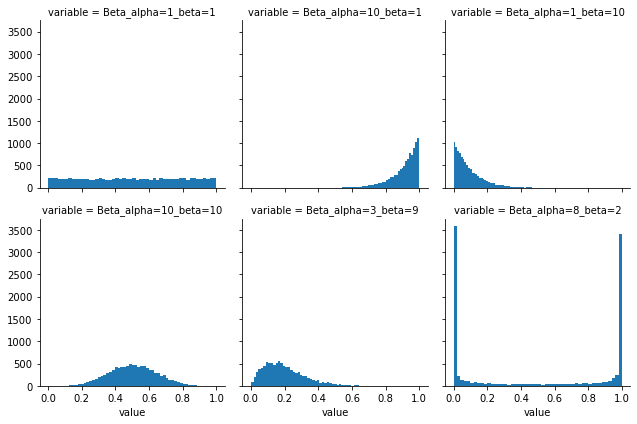

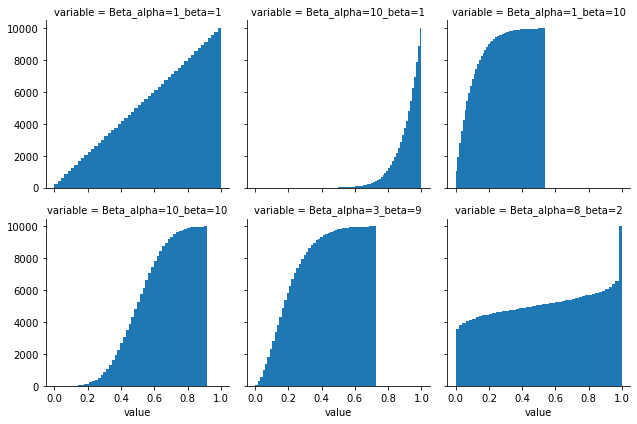

In [14]:
Graph_Beta = sns.FacetGrid(beta_melted, col="variable", sharex=True, col_wrap=3)
Graph_Beta.map(plt.hist, "value", cumulative=False, bins=50)
Graph_Beta_Cum = sns.FacetGrid(beta_melted, col="variable", sharex=True, col_wrap=3)
Graph_Beta_Cum.map(plt.hist, "value", cumulative=True, bins=50)

In [15]:
"""
Log-normal distribution. 
This is a great distributions for positive variables, especially if scale can differ (for example salaries). 
Assumtion is that the logarithm of variable of interest is normaly distributed. 
Observe how mean and variance of normal distribution are propagating through transformation.
"""

lognormal_dist_constant_mean_dict = dict()
lognormal_dist_constant_std_dict = dict()

for it in range(0,len(mean)):
    lognormal_dist_constant_mean_dict.update({"lognormal_dist_" + str(constant_mean) + "_" + str(std[it]):np.random.lognormal(constant_mean,std[it],10000)})
    lognormal_dist_constant_std_dict.update({"lognormal_dist_" + str(mean[it]) + "_" + str(constant_std):np.random.lognormal(mean[it],constant_std,10000)})


In [16]:
lognormal_constant_mean_df = pd.DataFrame.from_dict(lognormal_dist_constant_mean_dict)
lognormal_constant_mean_melted = lognormal_constant_mean_df.melt()
lognormal_constant_std_df = pd.DataFrame.from_dict(lognormal_dist_constant_std_dict)
lognormal_constant_std_melted = lognormal_constant_std_df.melt()

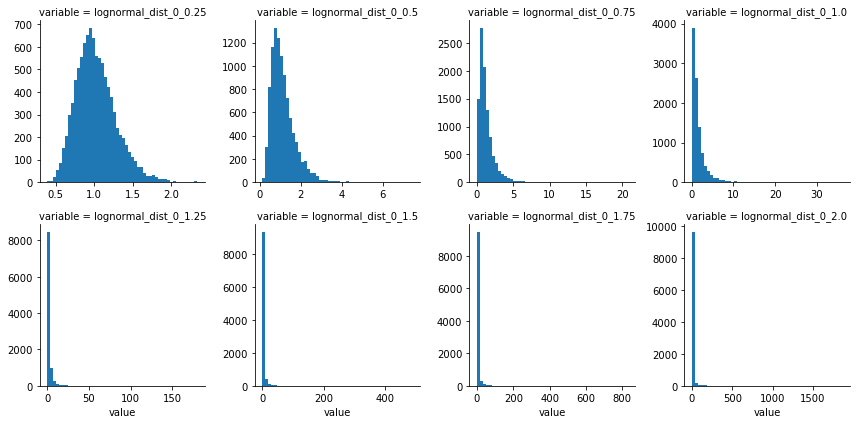

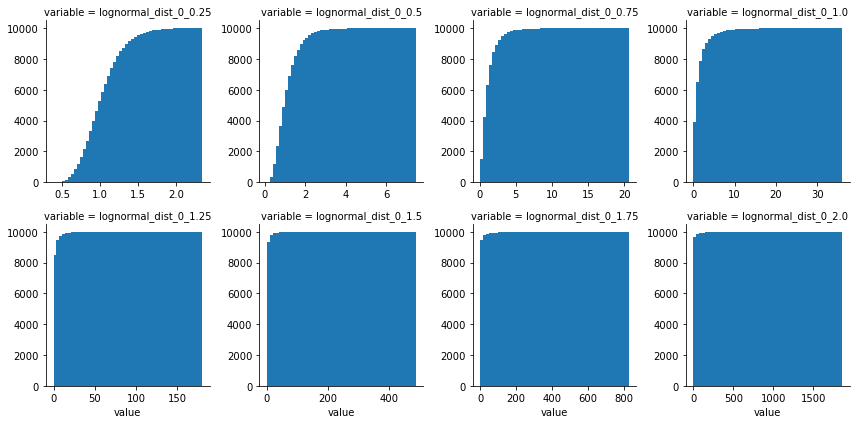

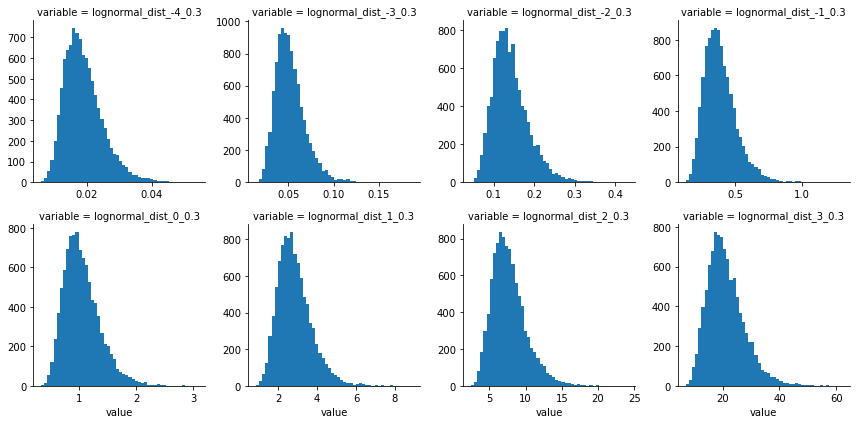

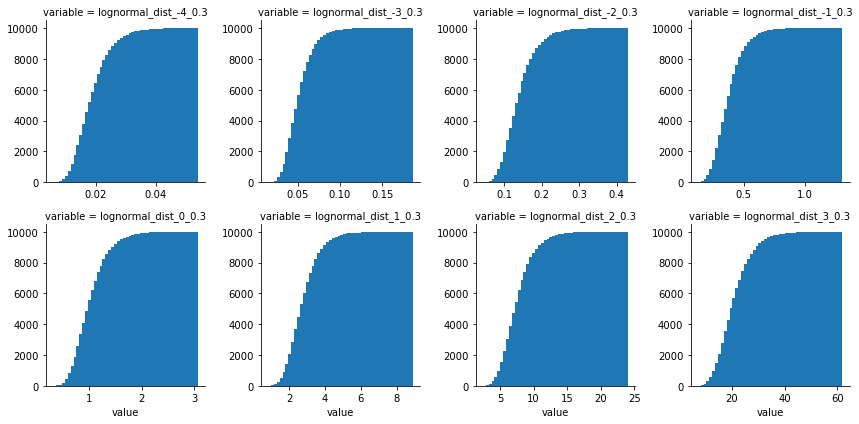

In [17]:
Graph_Lognormal = sns.FacetGrid(lognormal_constant_mean_melted, col="variable", sharex=False, sharey=False, col_wrap=4)
Graph_Lognormal.map(plt.hist, "value", cumulative=False, bins=50)
Graph_Lognormal_Cum = sns.FacetGrid(lognormal_constant_mean_melted, col="variable", sharex=False, sharey=False, col_wrap=4)
Graph_Lognormal_Cum.map(plt.hist, "value", cumulative=True, bins=50)
Graph_Lognormal = sns.FacetGrid(lognormal_constant_std_melted, col="variable", sharex=False, sharey=False, col_wrap=4)
Graph_Lognormal.map(plt.hist, "value", cumulative=False, bins=50)
Graph_Lognormal_Cum = sns.FacetGrid(lognormal_constant_std_melted, col="variable", sharex=False, sharey=False, col_wrap=4)
Graph_Lognormal_Cum.map(plt.hist, "value", cumulative=True, bins=50)